# One Sample t-Test #

In this notebook, we will learn:

- How to conduct a 1-sample t-test
- How to interpret the results and report them so that others can understand them
- How to find a confidence interval for the mean of a population
- How the confidence interval itself can be interpretted instead of running a t-test
- How to do similar things as above with simulations

From the `scipy.stats` module we'll import `scipy.stats.ttest_1samp` as simply `ttest`.


In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy.stats import ttest_1samp as ttest
from scipy.stats import t
import scipy.stats as stats
import scipy.stats

def favstats(table, data):
    ### This function will find all the major descriptive stats you need ###
    cut = table.column(data)
    favstats = Table().with_column('mean', np.average(cut))
    favstats = favstats.with_column('std', stats.tstd(cut))
    favstats = favstats.with_column('min', min(cut))
    favstats = favstats.with_column('Q1', np.percentile(cut, 25))
    favstats = favstats.with_column('median', np.median(cut))
    favstats = favstats.with_column('Q3', np.percentile(cut, 75))
    favstats = favstats.with_column('max', max(cut))
    favstats = favstats.with_column('IQR', stats.iqr(cut))
    favstats = favstats.with_column('n', len(cut))
    return favstats

from hide_code3 import hide_code

hide_code()


# T-Distribution #

The t-distribution is a probability distribution, like the standard normal distribution that we learned about before, but it has an extra parameter, the *degrees of freedom*.  The degrees of freedom affect the shape of the distribution:

![T-dist with Normal](TwNormal2.gif)

As you can see from the gif above, when the degrees of freedom (df) are low, the tails of the distribution are thicker and the hump in the middle is shorter.  

The red curve shown is the standard normal distribution.  As the *df* increase, the t-distribution converges to the standard normal.  


This t-distribution is the probability distribution used to compute p-values whenever we do any type of t-test.  

## Examples of Questions ##

### Questions ###

1. Do students take 5 classes per semester on average?
 
2. Students get at least 8 hours of sleep per night?

3. Do babies born to women who do not smoke weigh more than 115 oz on average?


Throughout this notebook, let's set $\alpha  = 0.05$.  So we'll consider a p-value to be small if $p < 0.05$.  

In [2]:
classes = Table.read_table('classdata.csv')
classes

CollegeYear,SleepHours,FavSport,NumCourses,ComputerType,LunchAmt
Second,8,Basketball,6,Mac,11
Second,7,Tennis,5,Mac,10
Second,8,Soccer,5,Mac,10
First,9,Basketball,5,Mac,4
Second,4,Basketball,6,PC,0
Third,7,None,4,PC,11
Second,7,Basketball,5,Mac,7
First,7,Basketball,6,PC,0
Third,8.5,Basketball,4,Mac,10
Third,7,Basketball,6,PC,7


To complete a Bachelors in 4 years (without summers), a student must average 15 credit hours per semester.  Most classes are 3 credit hours, so this is an average of 5 classes a semester.  On average do students take 5 classes per semester?

In [3]:
favstats(classes, 'NumCourses')

mean,std,min,Q1,median,Q3,max,IQR,n
5.01678,0.698522,2,5,5,5,9,0,298


In [4]:
ttest(classes.column('NumCourses'), popmean=5)

Ttest_1sampResult(statistic=0.4146500929078039, pvalue=0.6786974101872751)

# What is this test doing? #

## Step 1: Determine the null and alternative hypotheses 

The null hypothesis for a 1-sample t-test is typically:

$H_o: \mu = \mu_o$

And the alternative is one of these:

$H_a: Pick\ one\   \left\{ \begin{array}{l} \mu \not= \mu_o \\ \mu < \mu_o \\ \mu > \mu_o \end{array} \right.$


So in this case it's $H_o: \mu = 5$ and $H_a: \mu \not= 5$.


## Full Disclosure ## 

After step 1, you won't be doing any of the rest of this "manually", essentially *ever*.  But it is important to understand what the test is doing.


## Step 2: Compute test statistic (t)

Now that we know the null hypothesis, we can compute the test statistic, in this case it's computed as follows:

$$  t = \frac{ \overline{x} -\mu_o}{\frac{S_x}{\sqrt{n}}}$$


## Step 3: Degrees of freedom

Then we find the degrees of freedom, for a 1-sample t-test the degrees of freedom are $n - 1$. 

Once the degrees of freedom are known, the correct t-distribution graph can be used to find the p-value.  

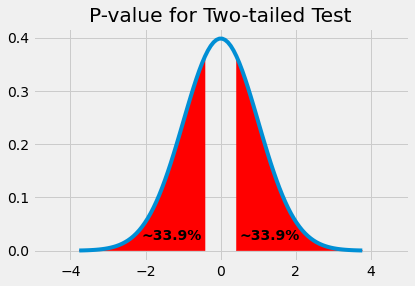

In [5]:
rv = t(df=297, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(-5,5)
plots.plot(x,y)
plots.fill_between(x, y, where = abs(x) > 0.4146, color="r")
plots.title("P-value for Two-tailed Test")
plots.text(.5, .02, "~33.9%", color="black", weight="bold", size="medium")
plots.text(-2.1, .02, "~33.9%", color="black", weight="bold", size="medium");
hide_code()

## Step 4: Computing the p-value

In this example, the test statistic was $t \approx 0.414$.  And we're using the so-called two-tailed alternative, the one with $\not=$ in it.  

So we mark the point with $x = 0.414$ **and** the point $x = -0.414$ on the x-axis, and we find the shaded region *outside* of those spots but under the curve.  This is the p-value.  

## Again, you really do not need to know how to do this by-hand ##

And we don't generally draw the t-distribution as part of running a t-test.  We just examine the output.  But it is nice to understand what the computer is doing, so we can interpret the results.  

Any way, recall this was the output:

**Ttest_1sampResult(statistic=0.4146500929078039, pvalue=0.6786974101872751)**

### Reporting out:  ###

#### The mean of this sample is 5.017 classes (per student per semester).  This is not statistically significant (t = 0.414, p = 0.679), therefore this not evidence that the mean number of classes a student takes per semester is anything other than 5 . ####


## Second Question ##

Students get at least 8 hours of sleep per night?

$H_o: \mu = 8$

$H_a: \mu < 8$



In [6]:
favstats(classes, 'SleepHours')

mean,std,min,Q1,median,Q3,max,IQR,n
7.3594,1.33187,0,7,7.5,8,11,1,298


In [7]:
ttest(classes.column('SleepHours'), 8)

Ttest_1sampResult(statistic=-8.303041142198296, pvalue=3.62655674617568e-15)

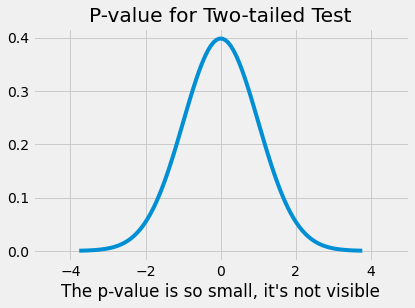

In [8]:
rv = t(df=297, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(-5,5)
plots.plot(x,y)
plots.fill_between(x, y, where = abs(x) > 8.3, color="r")
plots.title("P-value for Two-tailed Test")
plots.xlabel("The p-value is so small, it's not visible");
hide_code()

In [9]:
## Finding the 1-tailed p-value
0.5*3.62655674617568e-15

1.81327837308784e-15

### Reporting out ###

#### The mean of this sample is about 7.4 hours of sleep (per night per student), this is statistically significant (t = -8.303, p = 1.813e-15).  This implies that students do get less than 8 hours of sleep per night on average.  See Figure 1 below.  ####

Sometimes the entity who receives the information you're presenting does not really care about the exact p-value.  In which case, something along these lines might be seen instead.  

#### The mean of this sample is about 7.4 hours of sleep (per night per student), this is statistically significant <span style="color: red;"> (t = -8.303, p < 0.001) </span>.  This implies that students do get less than 8 hours of sleep per night on average.  See Figure 1 below. #### 

(The <span style="color: red;"> red </span> was added for emphasis.)

Also, in many circumstances it would be appropriate to give you audience a graphical display, such as the boxplot shown below.  As we go forward in the class, learning new tests and how to report their results, we'll include a figure with the report out whenever it is appropriate.  (As a joke, it will always be Figure 1.)


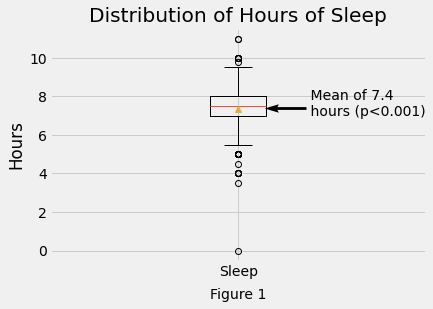

In [10]:
plots.boxplot(classes.column('SleepHours'), showmeans=True)
plots.xticks(make_array(1), make_array("Sleep"))
plots.ylabel("Hours")
plots.text(1.18, 7., " Mean of 7.4 \n hours (p<0.001)")
plots.quiver(1.18, 7.4, -1,0, scale = 9)
plots.title("Distribution of Hours of Sleep")
plots.text(1,-2.5,"Figure 1", ha ='center');

hide_code()

## Change the question ##

Does this data suggest that students get less than 7.5 hours of sleep per night, on average?


In [11]:
ttest(classes.column('SleepHours'), 7.5)

Ttest_1sampResult(statistic=-1.822406620524411, pvalue=0.06939877765457692)

In [12]:
0.06939877765457692/2

0.03469938882728846

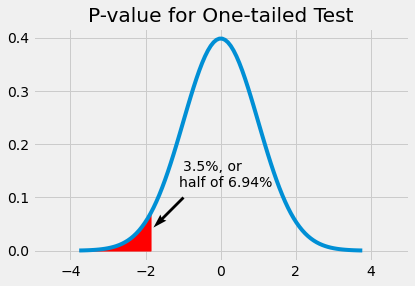

In [13]:
rv = t(df=297, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(-5,5)
plots.plot(x,y)
plots.fill_between(x, y, where = x < -1.822, color="r")
plots.quiver(-1, 0.1, -2, -2, scale = 25)
plots.text(-1, 0.15, "3.5%, or ")
plots.text(-1.1, 0.12,"half of 6.94%")
plots.title("P-value for One-tailed Test");
hide_code()

### Reporting out ###

#### The mean of this sample is about 7.4 hours of sleep (per night per student), this is statistically significant (t = -1.822, p = 0.035).  This implies that students do get less than 7.5 hours of sleep per night on average.  See Figure 1 below ####

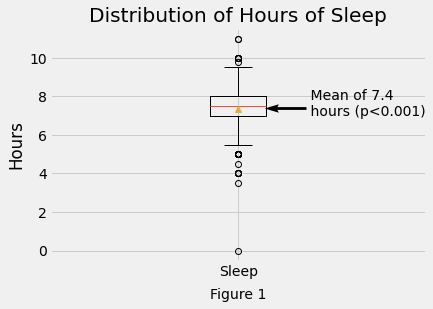

In [14]:
plots.boxplot(classes.column('SleepHours'), showmeans=True)
plots.xticks(make_array(1), make_array("Sleep"))
plots.ylabel("Hours")
plots.text(1.18, 7., " Mean of 7.4 \n hours (p<0.001)")
plots.quiver(1.18, 7.4, -1,0, scale = 9)
plots.title("Distribution of Hours of Sleep")
plots.text(1,-2.5,"Figure 1", ha ='center');

hide_code()

## Third Question ##

Do babies born to mothers that don't smoke tend to weigh more than 118 ounces?

The cell below prepares a sample of size 35 chosen using a systematic (random) sampling technique from a population of 700 babies.  We'll use that to address this question.

In [15]:
births =Table.read_table("baby.csv")
nonsmokers = births.where('Maternal Smoker', False)
nonsmokers = nonsmokers.take(np.arange(1,700,20))

## The Hypotheses ##

$H_o: \mu = 118$

$H_a: \mu > 118$


In [16]:
favstats(nonsmokers, 'Birth Weight')

mean,std,min,Q1,median,Q3,max,IQR,n
124.057,18.6657,85,112.5,124,136.5,173,24,35


In [17]:
ttest(nonsmokers.column('Birth Weight'), 118)

Ttest_1sampResult(statistic=1.919806810892742, pvalue=0.06330483341803723)

In [18]:
0.06330483341803723/2

0.03165241670901862

### Reporting Out ###

#### The mean baby weight in our sample is 124 oz, which is statistically significant (t = 1.920, p = 0.032).  This implies that babies born to mothers that don't smoke have an average birth weight greater than 118 oz, on average. See Figure 1 below.  ####



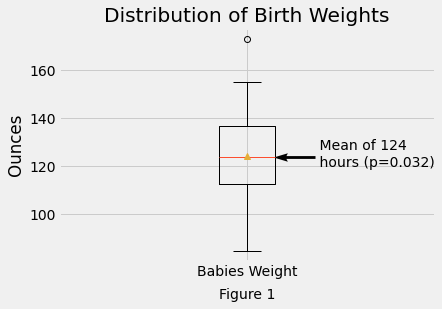

In [19]:
plots.boxplot(nonsmokers.column('Birth Weight'), showmeans=True)
plots.xticks(make_array(1), make_array("Babies Weight"))
plots.ylabel("Ounces")
plots.text(1.18, 120, " Mean of 124 \n hours (p=0.032)")
plots.quiver(1.18, 124, -1,0, scale = 9)
plots.title("Distribution of Birth Weights")
plots.text(1,65,"Figure 1", ha ='center');

hide_code()

## Confidence Intervals ##

Definition: A C-confidence interval is an interval produced by a process that captures the true mean of the underlying population C% of the time.  

The most common confidence interval is the 95%-confidence interval.  That is an interval that capture the true population mean 95% of the time.  

### Formula for t-intervals ###

$$ \overline{x} \pm t^* \frac{S_x}{\sqrt{n}}$$

The value you find using the $-$ sign is the lower bound, and the value that comes from using the $+$ sign is the upper bound.  

Let's break down the interval.

$\overline{x}$ is the sample mean, and is the initial estimate for the population mean.

$\displaystyle t^* \frac{S_x}{\sqrt{n}}$ is called the *Margin of Error*, or ME, for short.

$t^*$ is the the value along the appropriate t-distribution that captures the middle C% betweeen $-t^*$ and $+t^*$.  See the graph below.


$\displaystyle \frac{S_x}{\sqrt{n}}$ is called the *standard error*, and as the formula indicates is simply the sample standard deviation divided by the square root of the sample size.  


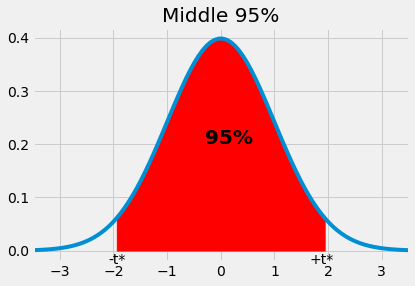

In [20]:
mean = 0
ste = 1

rv = t(df=297, loc=mean, scale=ste)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(mean-3.5*ste,3.5*ste+mean)
plots.plot(x,y)
#plots.plot([c_int[0],c_int[1]], [-.0001,-.0001], color="red",lw=3, zorder=1)
plots.fill_between(x, y, where = abs(x) < 1.96, color="r")
plots.title("P-value for Two-tailed Test")
plots.text(-0.3, .2, "95%", color="black", weight="bold", size="x-large")
plots.title("Middle 95%")
plots.text(-2.1,-.025, "-t*")
plots.text(1.65,-.025, "+t*");

hide_code()

You needn't concern yourself with how to calculate $t^*$ directly, but it is good to know that $t^*$ depends upon both the level of confidence you seek and the degrees of freedom (which really means the sample size in the 1-sample situation).  

For example: 

- If C = 95% and the sample size is 298, the $t^* \approx 1.968$.
- If C = 90% and the sample size is 298, then $t^* \approx 1.650$.
- If C = 90% and the sample size is 13, then $t^* \approx 1.782$.

Generally, as C goes up, $t^*$ goes up.  However, as the sample size goes up, $t^*$ goes down!  The latter is because larger samples are more generally more reliable when it comes to estimating the mean.  

Note: the **scipy.stats.t.ppf** function can be used to find $t^*$, as shown below, feel free to discuss or skip this as you see fit.  Students, if your instructor skips this but you're personally interested in figuring this part out, use help(t.ppf) to look at the help file on this function.

In [21]:
t.ppf(0.975, df = 297)

1.967983525375898

In [22]:
t.ppf(0.95, df = 297)

1.6500003008112845

In [23]:
t.ppf(0.95, df = 12)

1.782287555649159

In [24]:
#help(t.ppf)

## Examples of Questions ##

Consider the three questions we used in our examples from above.  Let's reformulate them in a way that makes more sense when discussing confidence intervals for the mean.  

### Questions ###

1. <strike>Do students take 5 classes per semester on average?</strike> Instead, on average how many classes per semester do students take? 
 
2. <strike>Students get at least 8 hours of sleep per night?</strike> Instead, how many hours of sleep per night do students get on average?

3. <strike>Do babies born to women who do not smoke weigh more than 115 oz on average?</strike> Instead, what is the average birth weight of babies born to mothers that do not smoke?

Starting with the first question:


In [25]:
data = classes.column('NumCourses')
mean = np.mean(data)
print(f"Sample mean is {mean}")

ste = stats.sem(data)

std = stats.tstd(data)
print(f"Sample std is {std}")

df = len(data)-1
print(f"Degrees of Freedom = {df}")

conf_level = 95

c_int=stats.t.interval(conf_level/100, df,  mean, ste)
print(f"The {conf_level}% confidence interval is {c_int}")

Sample mean is 5.016778523489933
Sample std is 0.6985220264888348
Degrees of Freedom = 297
The 95% confidence interval is (4.937145458471756, 5.09641158850811)


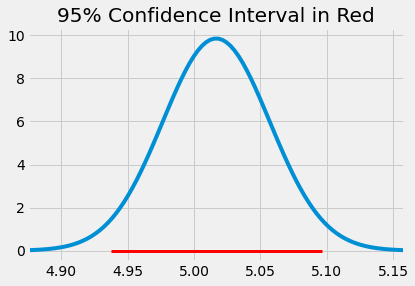

In [26]:
rv = t(df=297, loc=mean, scale=ste)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(mean-3.5*ste,3.5*ste+mean)
plots.plot(x,y)
plots.plot([c_int[0],c_int[1]], [-.0001,-.0001], color="red",lw=3, zorder=1)
plots.title("95% Confidence Interval in Red");
hide_code()

### Reporting the confidence interval ###

#### With a mean of 5.02 the 95%-confidence interval is (4.94, 5.10), or $5.02 \pm 0.08$. #### 

A confidence interval can also be interpretted in terms of a two-tailed hypothesis test.

When the null is $H_o: \mu = \mu_o$, if $\alpha$ is the cut-off for your p-value, then if $\mu_o$ is NOT inside your $(1-\alpha)$-confidence interval then you would reject the null hypothesis in favor of the two-tailed alternative.  

If $\mu_o$ IS inside the $(1-\alpha)$-confidence interval then you would FAIL to reject the null hypothesis.  

In this case, recall our null was $H_o: \mu = 5$ and $5 \in (4.94, 5.10)$; therefore, we would fail to reject the null hypothesis and conclude that the mean number of classes per student per semester is not significantly different from 5.  

Let's move on to our second example.

### Second Question ###

How many hours of sleep per night do students get on average?



In [27]:
data = classes.column('SleepHours')
mean = np.mean(data)
print(f"Sample mean is {mean}")

ste = stats.sem(data)

std = stats.tstd(data)
print(f"Sample std is {std}")

df = len(data)-1
print(f"Degrees of Freedom = {df}")

conf_level = 95

c_int=stats.t.interval(conf_level/100, df,  mean, ste)
print(f"The {conf_level}% confidence interval is {c_int}")

Sample mean is 7.359395973154362
Sample std is 1.3318662272882877
Degrees of Freedom = 297
The 95% confidence interval is (7.20756026024738, 7.511231686061343)


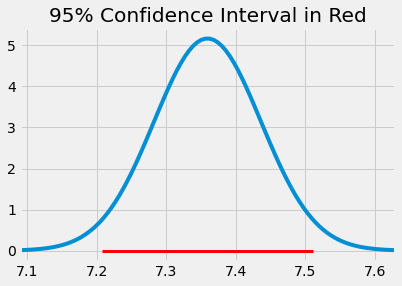

In [28]:
rv = t(df=297, loc=mean, scale=ste)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(mean-3.5*ste,3.5*ste+mean)
plots.plot(x,y)
plots.plot([c_int[0],c_int[1]], [-.0001,-.0001], color="red",lw=3, zorder=1)
plots.title("95% Confidence Interval in Red");

### Reporting the confidence interval ###

#### With a mean of 7.4 the 95%-confidence interval is (7.21, 7.51), or $7.36 \pm 0.15$. #### 

Recall, when we first used this data in this notebook it was with these hypotheses:

$H_o: \mu = 8$

$H_a: \mu < 8$

Since 8 is NOT inside this 95%-confidence interval, at the $\alpha = 0.05$ significance level, we would reject the null hypothesis in favor of the two-tailed alternative that the mean is simply not 8 hours (per night per student).  The actual hypothesis test we ran the first time had a directed alternative (one-tailed alternative).  This time, interpretting the 95% confidence interval yields the same result as the hypothesis test, even though one is one-tailed and the other is two-tailed.  

Recall, we used this same data to address a second hypothesis test, this time with these hypotheses:

$H_o: \mu = 7.5$

$H_a: \mu < 7.5$

Interpretting the 95%-confidence interval with $\mu_o = 7.5$ does not actually lead to the same result.  But there's a reason why.  If your alternative has a direction and you want to use a confidence interval to run the test, you need to use a $(1-2\alpha)$-confidence interval instead.  Look at the cell below this one.

The 90%-confidence interval is from 7.23 to 7.49, which is why at the $\alpha = 0.05$ significance level we reject the null hypothesis both when the null was set to 8 and when it was set to 7.5; because both of those numbers are outside the interval.  


In [29]:
data = classes.column('SleepHours')
mean = np.mean(data)
print(f"Sample mean is {mean}")

ste = stats.sem(data)

std = stats.tstd(data)
print(f"Sample std is {std}")

df = len(data)-1
print(f"Degrees of Freedom = {df}")

conf_level = 90

c_int=stats.t.interval(conf_level/100, df,  mean, ste)
print(f"The {conf_level}% confidence interval is {c_int}")

Sample mean is 7.359395973154362
Sample std is 1.3318662272882877
Degrees of Freedom = 297
The 90% confidence interval is (7.232093600578573, 7.48669834573015)


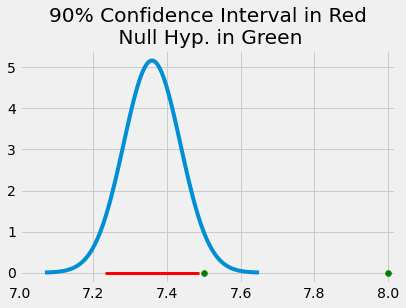

In [30]:
rv = t(df=297, loc=mean, scale=ste)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(7,8.02)
plots.plot(x,y)
plots.plot([7.232,7.487], [-.0001,-.0001], color="red",lw=3, zorder=1)
plots.scatter([7.5,8], [-.00001,-.00001], color="green")
plots.title("90% Confidence Interval in Red\n Null Hyp. in Green");

### Third Question: ###

What is the average birth weight of babies born to mothers that do not smoke?

In [31]:
data = nonsmokers.column("Birth Weight")
mean = np.mean(data)
print(f"Sample mean is {mean}")

ste = stats.sem(data)

std = stats.tstd(data)
print(f"Sample std is {std}")

df = len(data)-1
print(f"Degrees of Freedom = {df}")

conf_level = 95

c_int=stats.t.interval(conf_level/100, df,  mean, ste)
print(f"The {conf_level}% confidence interval is {c_int}")

Sample mean is 124.05714285714286
Sample std is 18.66570125554742
Degrees of Freedom = 34
The 95% confidence interval is (117.64525013765748, 130.46903557662824)


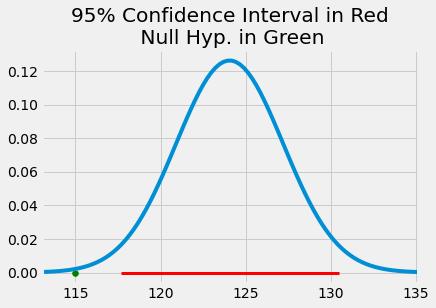

In [32]:
rv = t(df=297, loc=mean, scale=ste)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(mean-3.5*ste,3.5*ste+mean)
plots.plot(x,y)
plots.plot([c_int[0],c_int[1]], [-.0001,-.0001], color="red",lw=3, zorder=1)
plots.scatter(115, -0.0001, color="green")
plots.title("95% Confidence Interval in Red\n Null Hyp. in Green");

## Using Simulations ##

Let's address the pair of questions we asked earlier about students' sleep using the bootstrap method.

1. Do students get less than 8 hours of sleep per night on average?

$H_o: \mu = 8$

$H_a: \mu < 8$

Next, use the bootstrap method to re-sample our original data thousands of times, then use those resamples to calculate a p-value and a confidence interval.  


In [33]:
np.random.seed(4)

table = classes
variable = "SleepHours"

bunch_of_means = make_array()
reps = 5000

for i in np.arange(reps):
    one_sample_mean = np.mean(table.sample().column(variable))
    bunch_of_means = np.append(bunch_of_means, one_sample_mean)

The mean of these means is 7.361


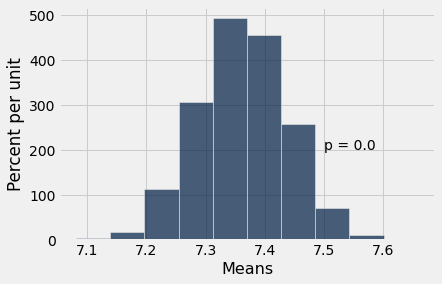

In [34]:
p = sum(bunch_of_means>=8)/reps    
mean = np.round(np.mean(bunch_of_means),3)

print(f"The mean of these means is {mean}")

Table().with_column("Means", bunch_of_means).hist('Means')
plots.text(7.5,2, f"p = {p}");

The follow up was do students get less than 7.5 hours per night on average?

$H_o: \mu = 7.5$

$H_a: \mu < 7.5$


We don't need to redo the simulation (unless we want), we just change the cut-off for where we count when finding the p-value.


The mean of these means is 7.361


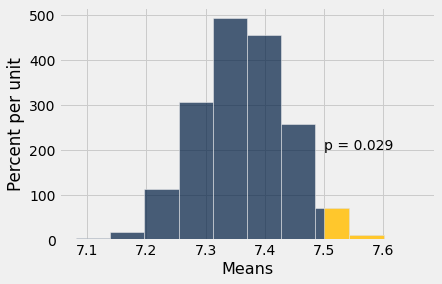

In [35]:
p = sum(bunch_of_means>=7.5)/reps    
mean = np.round(np.mean(bunch_of_means),3)

print(f"The mean of these means is {mean}")

Table().with_column("Means", bunch_of_means).hist('Means', left_end = 7.5)
plots.text(7.5,2, f"p = {p}");

In [36]:
# For a 95% confidence interval, leave 2.5% out on each side

np.percentile(bunch_of_means, [2.5, 97.5])

array([7.21409396, 7.50469799])

In [37]:
# For a 90% confidence interval, leave 5% out on each side

np.percentile(bunch_of_means, [5, 95])

array([7.23657718, 7.48422819])

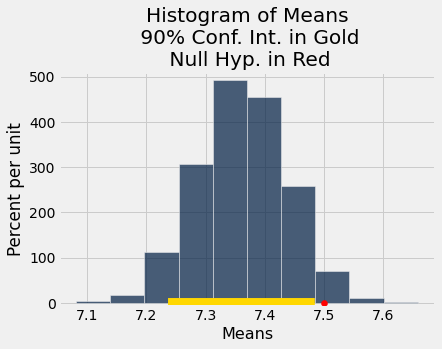

In [38]:
Table().with_column("Means", bunch_of_means).hist('Means')
plots.ylim(-0.05,5.1)
plots.title("Histogram of Means\n 90% Conf. Int. in Gold\n Null Hyp. in Red")
plots.plot([7.23657718, 7.48422819],[0,-0.00005], color="gold", lw=10, zorder=3)
plots.scatter(7.5, -0.005, color="red", zorder=4);

### Reporting Out ###

#### With $p \approx 0.029$, and a bootstrapped mean of about 7.4 hours per night, we conclude that on average students do get less than 7.5 hours of sleep per night.  The 95% confidence interval for the true mean amount of sleep per night is (7.21, 7.50).  The 90% confidence interval is (7.24, 7.48).  This latter interval, which misses 7.5 hours, is the one that is consistent with a one-tailed test at the 5% significance level.  ####